<a href="https://colab.research.google.com/github/Hsuan7/homework/blob/main/%E9%87%91%E8%9E%8D%E5%A4%A7%E6%95%B8%E6%93%9AW7_%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92ANN%E3%80%81CN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

使用 TensorFlow 或 PyTorch 實作類神經網路模型預測股票價格（TensorFlow 使用 Dense layer；PyTorch 使用 Linear layer）。
說明：使用收盤價或技術指標預測，預測N日後的股價

In [52]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

# 輸入股票代號
stock_id = "2330.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
#end = dt.date.today()
# 抓取半年資料（現在-過去180天）
#start = end - dt.timedelta(days=180)

'''抓取特定時間'''
start = dt.datetime(2020, 1, 1)  # 指定的開始日期
end = dt.datetime(2023, 1, 1)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

df

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW,2330.TW
0,2020-01-02 00:00:00+00:00,306.430237,339.0,339.0,332.5,332.5,31754120
1,2020-01-03 00:00:00+00:00,306.882202,339.5,345.0,335.5,344.0,41811268
2,2020-01-06 00:00:00+00:00,300.102753,332.0,334.5,332.0,333.0,45343057
3,2020-01-07 00:00:00+00:00,297.842957,329.5,333.0,326.5,332.5,50879181
4,2020-01-08 00:00:00+00:00,297.842957,329.5,333.0,325.0,325.0,37567748
...,...,...,...,...,...,...,...
729,2022-12-26 00:00:00+00:00,441.325256,456.5,457.0,453.5,454.0,8793306
730,2022-12-27 00:00:00+00:00,441.808624,457.0,462.5,457.0,458.0,10264001
731,2022-12-28 00:00:00+00:00,436.008057,451.0,452.0,446.0,451.0,32578949


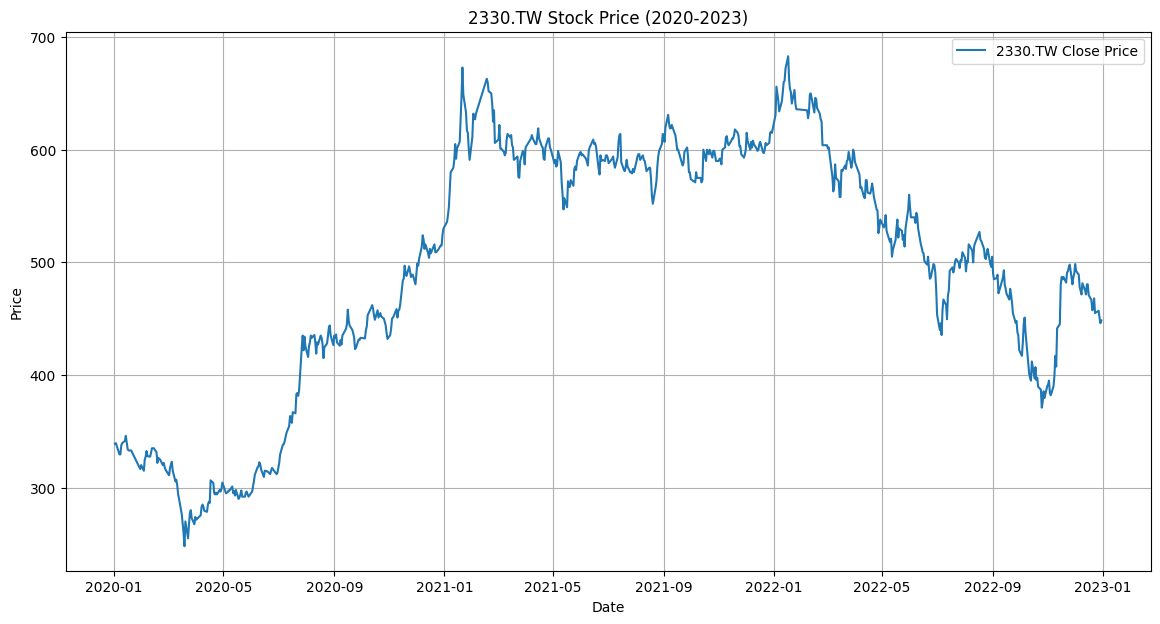

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Close'], label="2330.TW Close Price")
plt.title("2330.TW Stock Price (2020-2023)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [54]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 將收盤價標準化
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(df[['Close']])

# 設定預測N日後的股價
N = 1  # 這裡設定 N = 1，即使用今天的價格預測明天的價格
X = []
y = []

# 建立特徵和標籤
for i in range(len(df) - N):
    X.append(df['Close'].values[i:i + N])
    y.append(df['Close'].values[i + N])

X, y = np.array(X), np.array(y)

In [62]:
# 分割訓練和測試數據
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# 建立 ANN 模型 (使用 Dense 層)
model = Sequential()
model.add(Dense(64, input_dim=N, activation='relu'))  # 第一隱藏層
model.add(Dense(32, activation='relu'))               # 第二隱藏層
model.add(Dense(1, activation='linear'))              # 輸出層

# 編譯模型
model.compile(loss='mse', optimizer='adam')

# 訓練模型
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# 預測測試數據
predictions = model.predict(X_test)

# 反轉標準化
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# 評估模型
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.4490 - val_loss: 0.3224
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1256 - val_loss: 0.0526
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0212 - val_loss: 0.0016
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - val_loss: 0.0020
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - val_loss: 0.0026
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027 - val_loss: 8.7933e-04
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - val_loss: 5.9006e-04
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.2586e-04 - val_loss: 5.7345e-04
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6699e-04 - val_loss: 5.4498e-04
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.8258e-04 - val_loss: 5.3960e-04
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step -

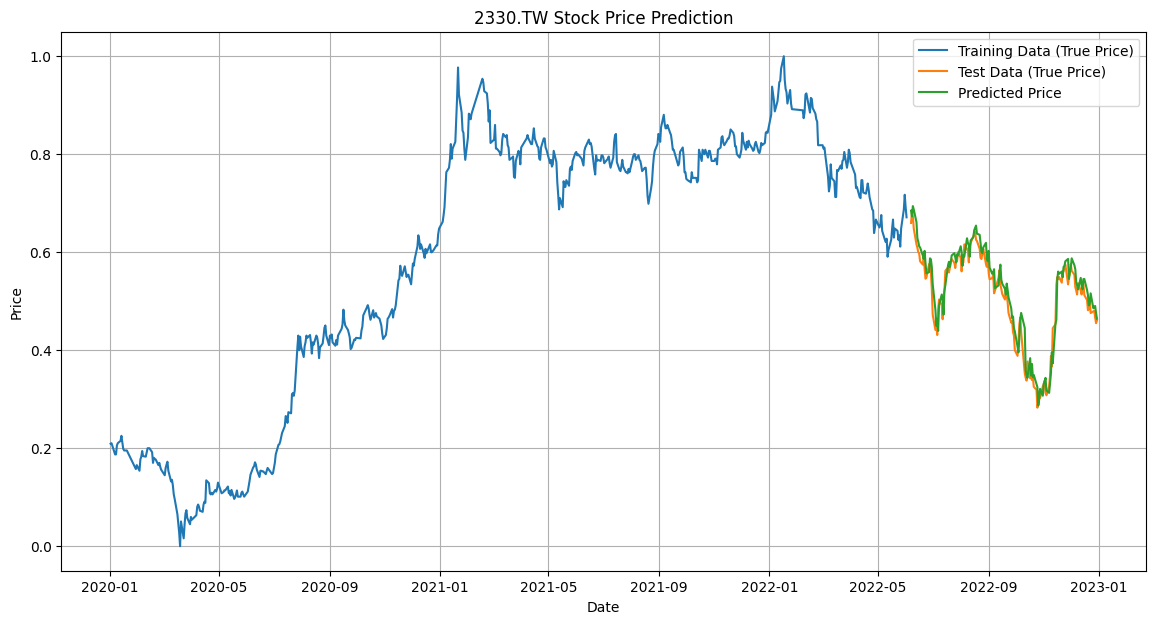

In [63]:
# 可視化訓練集與測試集
plt.figure(figsize=(14, 7))

# 繪製訓練集的真實價格
plt.plot(df.index[:train_size], scaler.inverse_transform(df[['Close']][:train_size]), label="Training Data (True Price)")  # 訓練集真實值

# 調整測試資料的索引範圍，確保預測和實際值對齊
adjusted_index = df.index[train_size + N:]

# 繪製測試集的真實價格與預測價格
plt.plot(adjusted_index, y_test_rescaled[:len(predictions_rescaled)], label="Test Data (True Price)")  # 測試集真實值
plt.plot(adjusted_index, predictions_rescaled, label="Predicted Price")  # 預測值

# 繪圖標題與軸標籤
plt.title("2330.TW Stock Price Prediction")
plt.xlabel("Date")
plt.ylabel("Price")

# 加上圖例與格線
plt.legend()
plt.grid(True)

# 顯示圖表
plt.show()


使用 TensorFlow 或 PyTorch 實作 CNN 捕捉 K 線趨勢，並預測股價漲跌（分類任務）。
說明：輸入一張 N 天的 K 線圖判斷未來價格可能漲或跌，label 方式可以使用技術指標輔助，例如：5日均線高於10日均線標註「漲」，5日均線低於10日均線標註「跌」